In [1]:
# import statements
import pandas as pd

In [79]:
# load data
df = pd.read_csv('3D_Print_Jobs_cleaned.csv')
df

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,highfreq_con,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,jzeng56@wisc.edu,X1C - White ASA/Teal ASA,61.98,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,3.10,User,2,8825108477,"Mar 31, 2025 4:29 PM"
1926,test_toolz,Shen,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,jzeng56@wisc.edu,X1C - White ABS/Blue ABS,29.47,Undergraduate,Bambu Labs PLA-CF,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.47,User,1,8825200318,"Mar 31, 2025 4:40 PM"
1927,Noel suarez - Challenge 4 print,Kai,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,nisuarez@wisc.edu,X1C - Blue PLA-CF/Gray PLA-CF,184.55,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,9.23,User,6,8823035854,"Mar 31, 2025 1:23 PM"
1928,WiSP nosecone,Ox,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,xli2599@wisc.edu,X1C - Black PLA-CF/Red PLA-CF,119.21,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,5.96,User,5,8825252393,"Mar 31, 2025 4:47 PM"


233.05

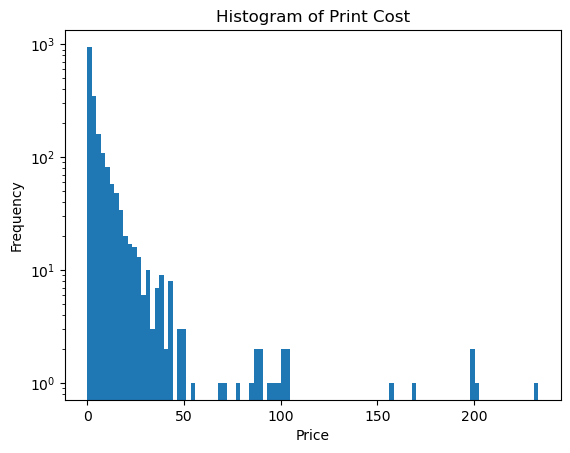

In [81]:
# Create histogram for pricing
ax = df['Print Cost'].plot.hist(bins=100, xlabel='Price', title='Histogram of Print Cost', logy=True)
fig = ax.get_figure()
fig.savefig('HistPrintCost.png')

df['Print Cost'].max()

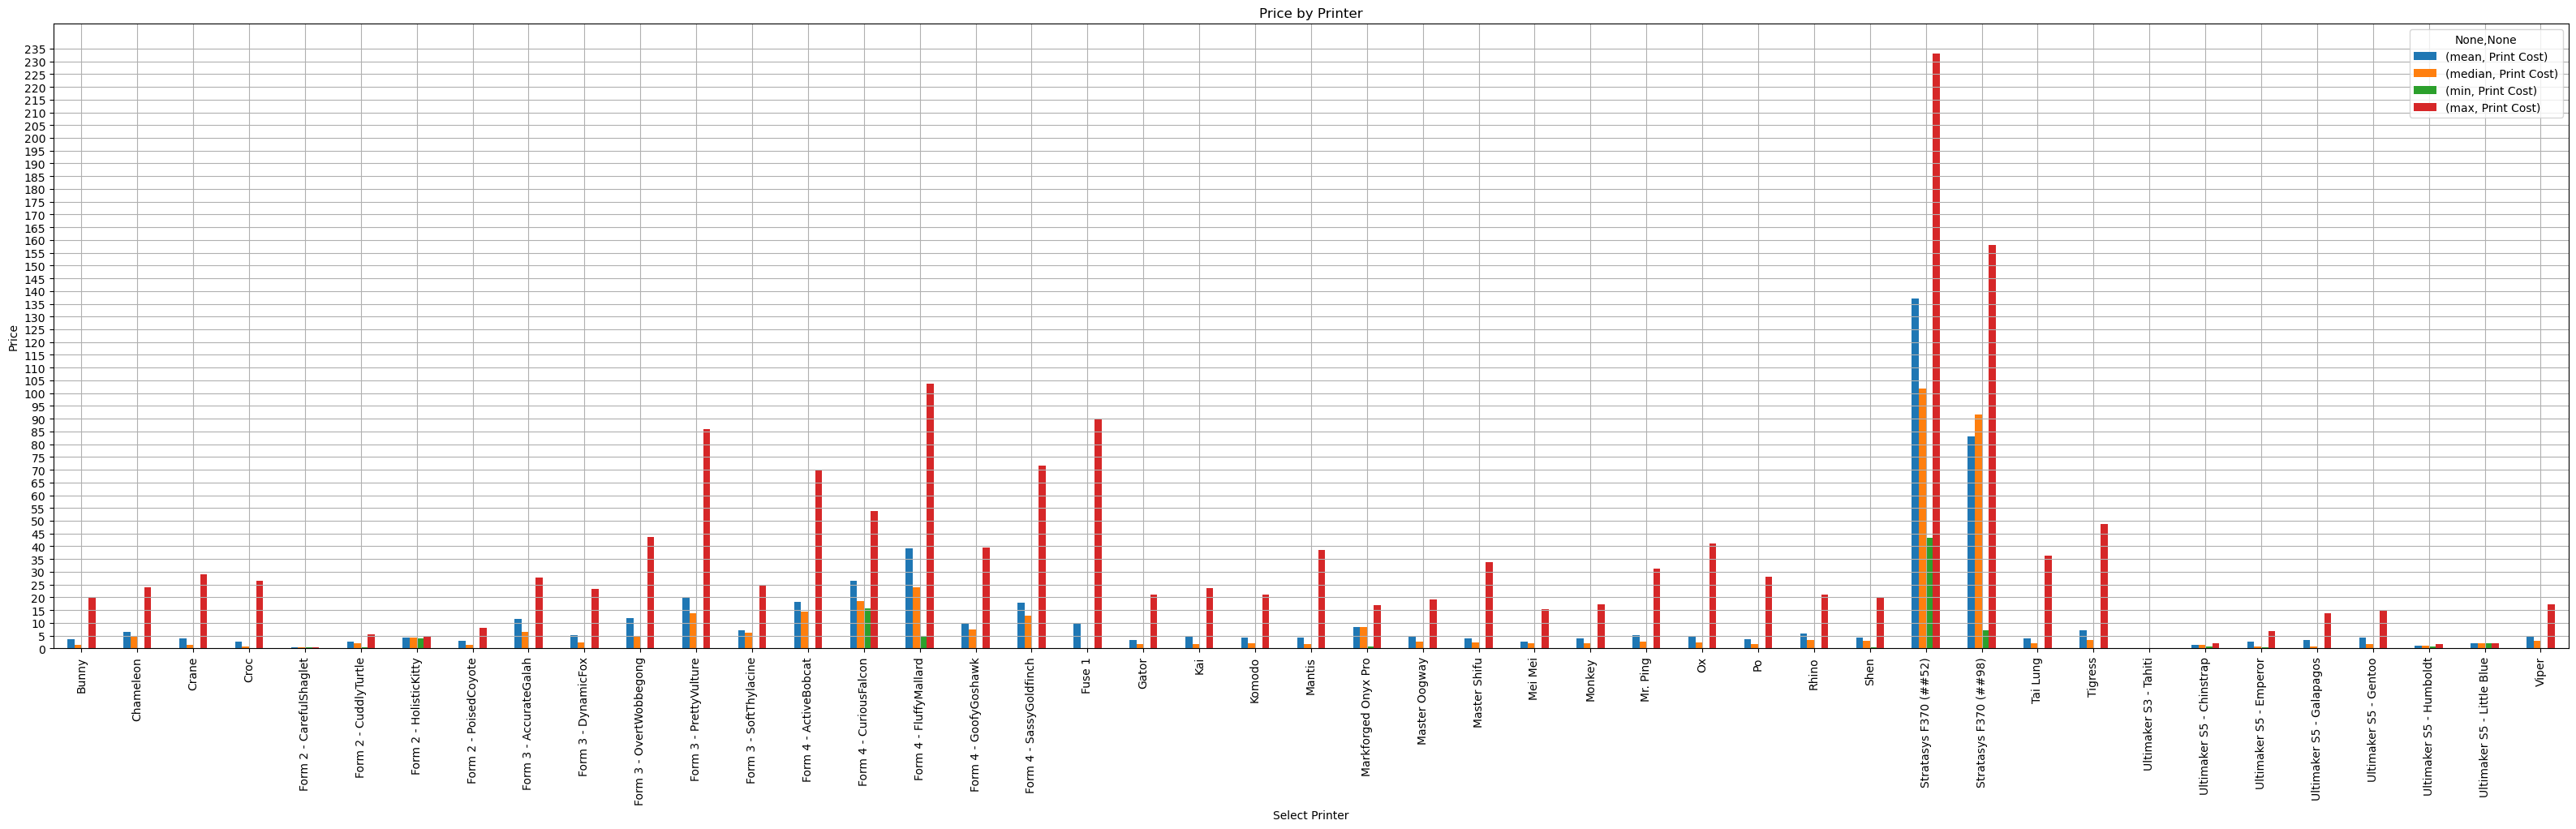

In [82]:
# Create bar chart for the average cost by printer
dfp = df.pivot_table(index='Select Printer', values='Print Cost', aggfunc=['mean', 'median', 'min', 'max'])

ax = dfp.plot.bar(figsize=(40,10), ylabel='Price', yticks=range(0,240,5), title='Price by Printer', grid=True)
fig = ax.get_figure()
fig.savefig('PriceByPrinter.png')

In [84]:
mat_1 = df['Material 1']
mat_1_qty = df['Material 1 Qty']

mat_2 = df['Material 2']
mat_2_qty = df['Material 2 Qty']

mats = list(mat_1.unique()) + list(mat_2.unique())
mats = list(dict.fromkeys(mats))
mat_usage = {}
for mat in mats:
    mat_usage[mat] = 0

length = len(df)
for i in range(length):
    mat_usage[ mat_1[i] ] += mat_1_qty[i]
    mat_usage[ mat_2[i] ] += mat_2_qty[i]

# Day of the Week

In [86]:
import datetime
import pandas as pd

In [90]:
# load data
df = pd.read_csv('3D_Print_Jobs_cleaned.csv')
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"


In [92]:
df['Creation Log'] = pd.to_datetime(df['Creation Log'])
df['Weekday'] = df['Creation Log'].dt.day_name()
df['Time'] = df['Creation Log'].dt.time
df['Hour'] = df['Creation Log'].dt.hour
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,...,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Weekday,Time,Hour
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,0.05,Bambu Labs,21.04,User,14,8171785086,2025-01-06 12:12:00,Monday,12:12:00,12
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,2025-01-10 13:36:00,Friday,13:36:00,13
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,4.85,User,3,8214392486,2025-01-10 13:38:00,Friday,13:38:00,13
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,13.73,User,9,8238119583,2025-01-14 10:53:00,Tuesday,10:53:00,10
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,1.83,User,1,8269757333,2025-01-17 14:40:00,Friday,14:40:00,14


<Axes: title={'center': 'Frequnecy of Prints for each Weekday'}, xlabel='Weekday', ylabel='Frequency'>

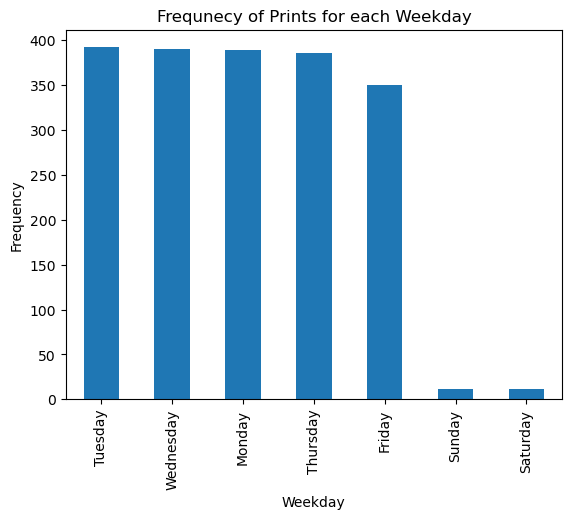

In [94]:
# histogram for weekday
df['Weekday'].value_counts().plot.bar(ylabel='Frequency', title='Frequnecy of Prints for each Weekday')

<Axes: title={'center': 'Incoming Print Requests on Monday'}, xlabel='Hour of the Day', ylabel='Frequency'>

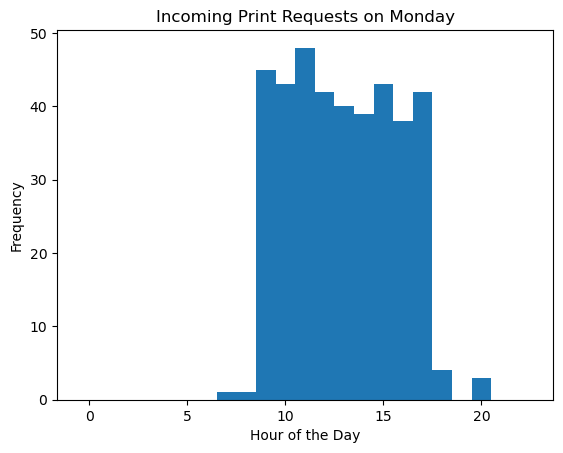

In [96]:
hour_bins = [ x-0.5 for x in range(0, 24) ]
df[ df['Weekday'] == 'Monday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Monday')

<Axes: title={'center': 'Incoming Print Requests on Tuesday'}, xlabel='Hour of the Day', ylabel='Frequency'>

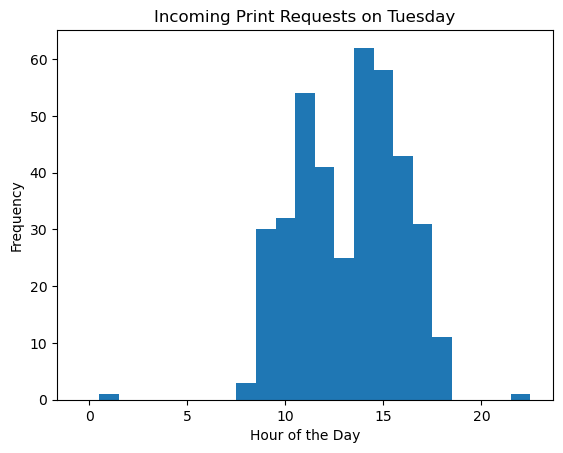

In [98]:
df[ df['Weekday'] == 'Tuesday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Tuesday')

<Axes: title={'center': 'Incoming Print Requests on Wednesday'}, xlabel='Hour of the Day', ylabel='Frequency'>

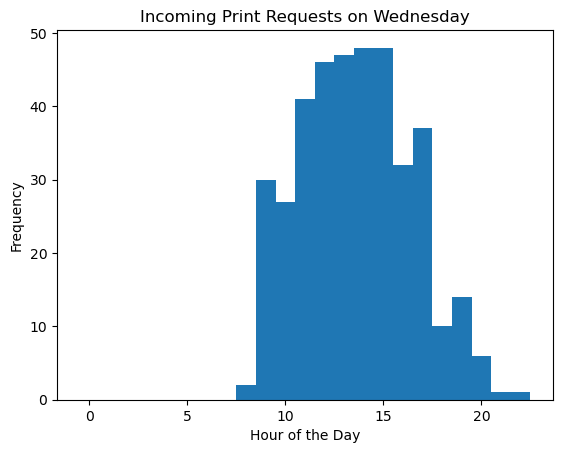

In [100]:
df[ df['Weekday'] == 'Wednesday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Wednesday')

<Axes: title={'center': 'Incoming Print Requests on Thursday'}, xlabel='Hour of the Day', ylabel='Frequency'>

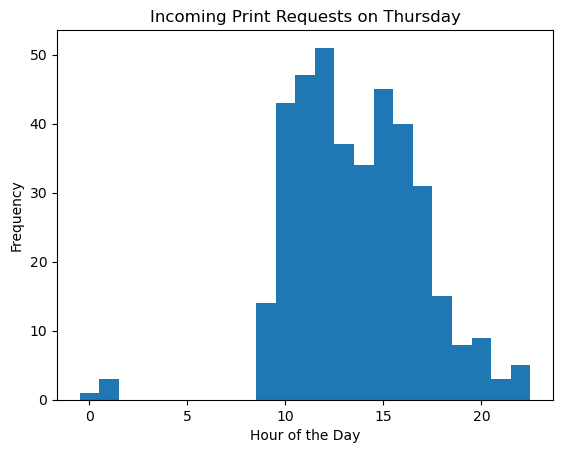

In [102]:
df[ df['Weekday'] == 'Thursday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Thursday')

<Axes: title={'center': 'Incoming Print Requests on Friday'}, xlabel='Hour of the Day', ylabel='Frequency'>

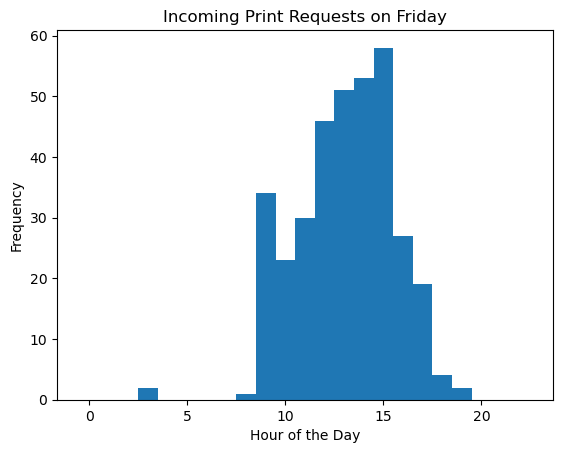

In [104]:
df[ df['Weekday'] == 'Friday'].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Friday')

<Axes: title={'center': 'Incoming Print Requests on Saturday'}, xlabel='Hour of the Day', ylabel='Frequency'>

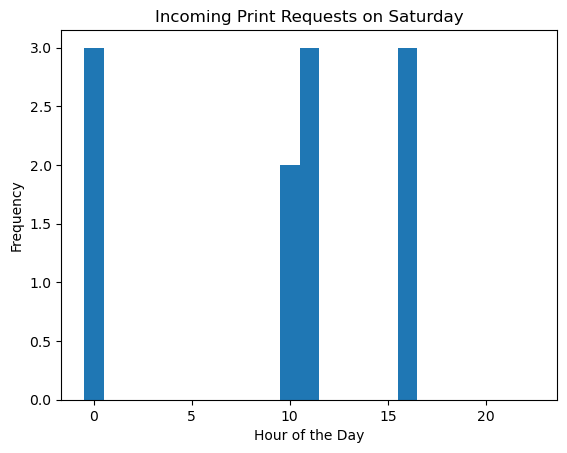

In [106]:
df[ df['Weekday'] == 'Saturday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Saturday')

<Axes: title={'center': 'Incoming Print Requests on Sunday'}, xlabel='Hour of the Day', ylabel='Frequency'>

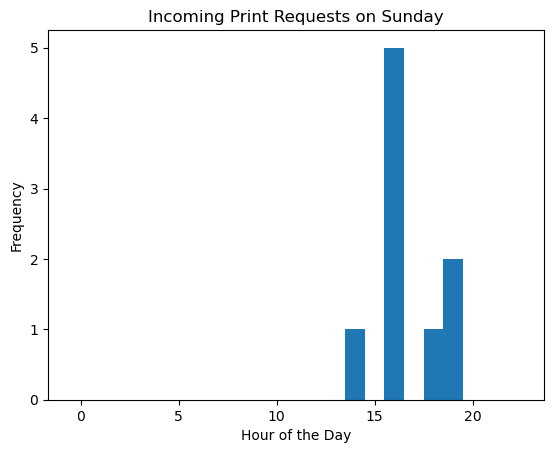

In [108]:
df[ df['Weekday'] == 'Sunday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Sunday')

In [110]:
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,...,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Weekday,Time,Hour
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,0.05,Bambu Labs,21.04,User,14,8171785086,2025-01-06 12:12:00,Monday,12:12:00,12
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,2025-01-10 13:36:00,Friday,13:36:00,13
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,4.85,User,3,8214392486,2025-01-10 13:38:00,Friday,13:38:00,13
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,13.73,User,9,8238119583,2025-01-14 10:53:00,Tuesday,10:53:00,10
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,1.83,User,1,8269757333,2025-01-17 14:40:00,Friday,14:40:00,14


In [112]:
df['Time 15'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S')
df['bin'] = df['Time 15'].dt.floor('15min').dt.time  # back to just time if needed

<Axes: xlabel='bin'>

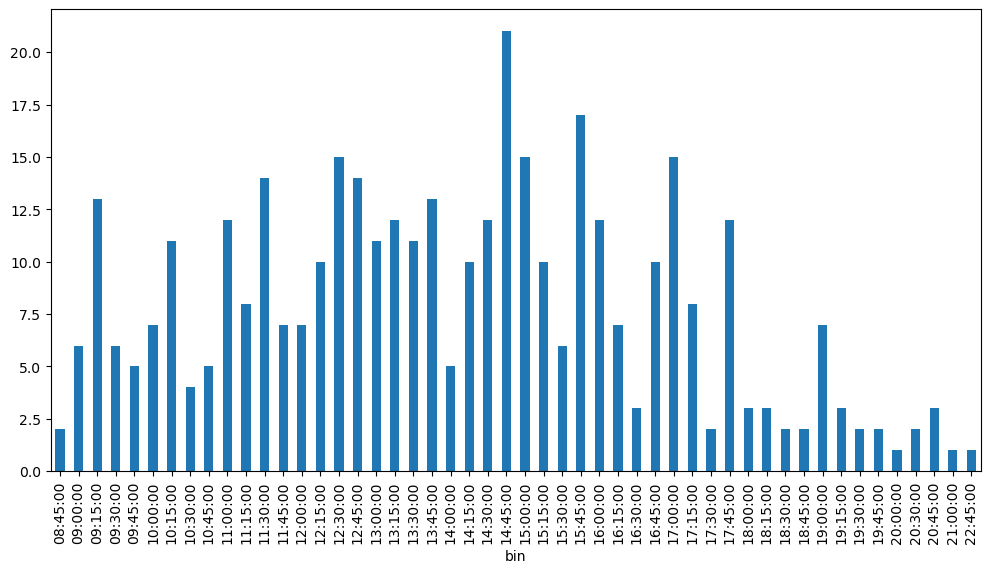

In [114]:
df[ df['Weekday'] == 'Wednesday' ].bin.value_counts().sort_index().plot(kind='bar', figsize=(12, 6))